## Pymaceuticals Summary
* Out of the nine drugs that were tested only two, Capomulin and Ramicane, lead to tumor volume reduction. 
* Though they did not reduce tumor volume, Propriva, Zoniferol, Infubinol, and Ceftamin slowed overall tumor growth as compared to the placebo group. Meanwhile Ketapril, Naftisol, and Stelasyn accelerated tumor growth as compared to the placebo group.
* Propriva and Infubinol, though they did slow tumor growth, had a lower survival rate as compared to the placebo. These drug seems to target both healthy and cancerous tissue.
* All of the treatments, except Ketapril, did curb metastatic spread as compared to the placebo.


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_tril_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_df = clinical_tril_df.merge(mouse_drug_df,how='inner',on='Mouse ID')

# Display the data table for preview
data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_df = pd.DataFrame(sem).reset_index().rename(columns={'Tumor Volume (mm3)': 'SEM'})

# Preview DataFrame
sem_df.head()


,Drug,Timepoint,SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df = mean_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


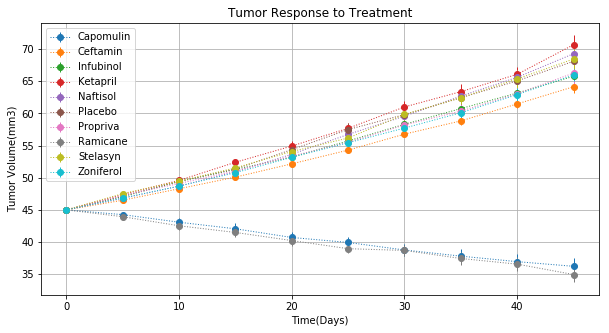

In [84]:
# Generate the Plot (with Error Bars)
errors = sem_df.pivot(index='Timepoint',columns='Drug',values='SEM')
mean_tumor_volume_df.plot(kind='line',grid=True,marker = 'o',linestyle=':',linewidth=1.0,figsize=(10, 5),yerr=errors)

# Label axes and add title
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Response to Treatment")
plt.legend()

# Save the Figure
plt.savefig('tumor_response.png')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_data = data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_metastatic_df = pd.DataFrame(mean_metastatic_data).reset_index()

# Preview DataFrame
mean_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
met_sem_df = pd.DataFrame(met_sem).reset_index().rename(columns={'Metastatic Sites': 'SEM'})

# Preview DataFrame
met_sem_df.head()

,Drug,Timepoint,SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_df = mean_metastatic_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
mean_metastatic_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


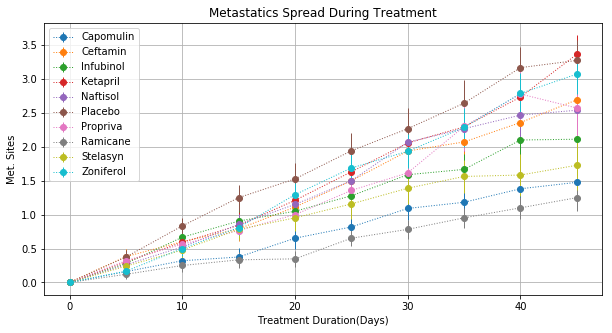

In [85]:
# Generate the Plot (with Error Bars)
errors = met_sem_df.pivot(index='Timepoint',columns='Drug',values='SEM')
mean_metastatic_df.plot(kind='line',grid=True,marker = 'o',linestyle=':',linewidth=1.0,figsize=(10, 5),yerr=errors)

# Label axes and add title and legend
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatics Spread During Treatment")
plt.legend()

# Save the Figure
plt.savefig('metastatic_spread.png')

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = data_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
survival_count_df = pd.DataFrame(survival_count).reset_index().rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
survival_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
survival_count_df = survival_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
survival_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


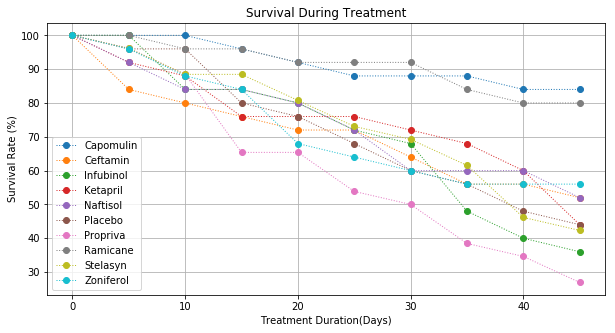

In [86]:
# Create survival rate dataframe
survival_rate_df = pd.DataFrame()
for col in survival_count_df:
    survival_rate_df[col] = 100*survival_count_df[col]/survival_count_df[col].max()
    
# Generate the Plot (Accounting for percentages)
survival_rate_df.plot(kind='line',grid=True,style='o:',linewidth=1.0,figsize=(10, 5))

plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.legend()

# Save the Figure
plt.savefig('survival_rate.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [36]:
# Calculate the percent changes for each drug
tumor_volume_pct_chg = pd.Series()
for col in mean_tumor_volume_df:
    tumor_volume_pct_chg[col] = 100*(mean_tumor_volume_df[col][45]-mean_tumor_volume_df[col][0])/mean_tumor_volume_df[col][0]

tumor_volume_pct_chg = tumor_volume_pct_chg.sort_values(ascending=False)
# Display the data to confirm
print(tumor_volume_pct_chg)

Ketapril     57.028795
Naftisol     53.923347
Stelasyn     52.085134
Placebo      51.297960
Propriva     47.241175
Zoniferol    46.579751
Infubinol    46.123472
Ceftamin     42.516492
Capomulin   -19.475303
Ramicane    -22.320900
dtype: float64


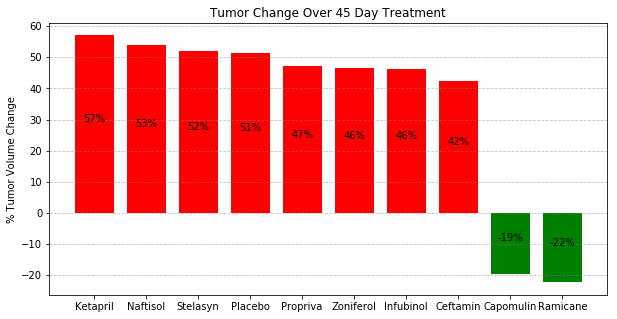

In [38]:
# Plot Tumor Volume Percentage Change

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.75       # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

vol_decrease = tumor_volume_pct_chg[8:10]
rects1 = ax.bar(ind[8:10], vol_decrease, width, color='g')

vol_increase = (tumor_volume_pct_chg[0:8])
rects2 = ax.bar(ind[0:8], vol_increase, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind)
ax.set_xticklabels(tumor_volume_pct_chg.index.values)
plt.grid(True, linestyle='--', which='major',axis='y',color='grey', alpha=.5)

# Function to add labels to the bars
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .5*height,
                '%d' % int(height) + '%',
                ha='center', va='bottom')

# Add labels
autolabel(rects1)
autolabel(rects2)

# Save the Figure
plt.savefig('tumor_pct_change.png')

# Show figure
plt.show()







In [78]:
data_df.loc[data_df['Timepoint']==0,'Mouse ID'].unique().size

249

In [79]:
t0 = data_df.loc[data_df['Timepoint']==0]
duplicates = t0.duplicated(keep=False)
t0[duplicates]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
860,g989,0,45.0,0,Stelasyn
861,g989,0,45.0,0,Propriva
862,g989,0,45.0,0,Stelasyn
863,g989,0,45.0,0,Propriva
